<a href="https://colab.research.google.com/github/hanYijin/python_Machine_learning_study/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OpenCV 도형그리기


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**선그리기** 

cv2.line(이미지, 시작 좌표, 종료 좌표, 색상, 두께)

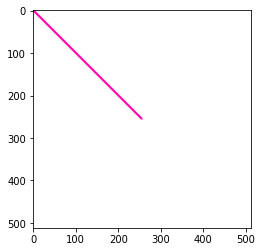

In [8]:
image= np.full((512,512,3),255,np.uint8)
image=cv2.line(image,(0,0),(255,255),(255,0,170),3)
plt.imshow(image)

**사각형 그리기**

cv2.rectangle(이미지, 시작 좌표, 종료 좌표 ,색상(RGB),선의 두께)

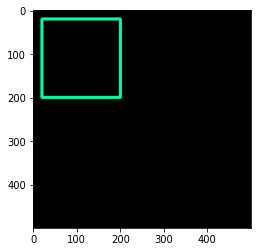

In [11]:
img = np.full((500,500,3),0,np.uint8)
img = cv2.rectangle(img,(20,20),(200,200),(0,255,170),5)
plt.imshow(img)

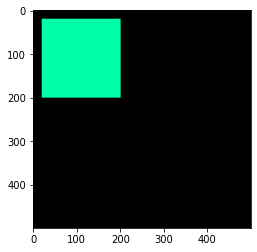

In [13]:
img = np.full((500,500,3),0,np.uint8)
img = cv2.rectangle(img,(20,20),(200,200),(0,255,170),-1)
plt.imshow(img)

**원그리기**

cv2.circle(이미지, 원의 중심, 반지름 , 색상, 선의 두께)
*채우기 : 선의 두께 -1

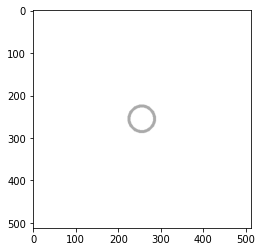

In [16]:
image= np.full((512,512,3),255,np.uint8)
image= cv2.circle(image,(255,255),30,(170,170,170),5)
plt.imshow(image)

**다각형 그리기**

cv2.polylines(이미지, 꼭지점들, 닫힌 도형 여부, 색상, 선의 두께)

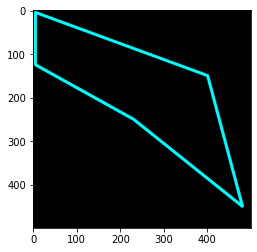

In [24]:
img = np.full((500,500,3),0,np.uint8)
point=np.array([[5,5],[5,125],[230,250],[480,450],[400,150]])
img= cv2.polylines(img,[point],True,(0,255,255),5)
plt.imshow(img)

**텍스트 그리기**

cv2.putText(이미지, 텍스트, 출력될 위치, 글씨체, 글씨 크기 가중치, 색상)

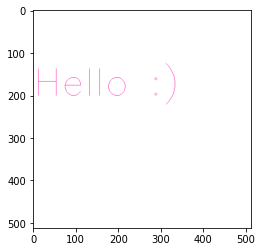

In [34]:
image= np.full((512,512,3),255,np.uint8)
image=cv2.putText(image,"Hello :)",(0,200),cv2.FONT_HERSHEY_SIMPLEX,3,(255,0,170))
plt.imshow(image)

# **OpenCV Contours 이미지 윤곽선**

이미지에서 윤곽선들을 찾는 함수

cv2.findContours(이미지, 윤곽선을 찾는 방법, 윤곽선을 찾는 근사치 방법)

Contour들을 찾는 방법

1) RETR_EXTERNAL: 바깥쪽 Line만 찾기

2) RETR_LIST: 모든 Line을 찾지만, Hierarchy 구성 X

3) RETR_TREE: 모든 Line을 찾으며, 모든 Hierarchy 구성 O

method: Contour들을 찾는 근사치 방법

1) CHAIN_APPROX_NONE: 모든 Contour 포인트 저장

2) CHAIN_APPROX_SIMPLE: Contour Line을 그릴 수 있는 포인트만 저장

 **입력 이미지는 Gray Scale Threshold 전처리 과정이 필요하다.**

윤곽선들을 그리는 함수

cv2.drawContours(image, contours, contour_index, color, thickness)

contour_index: 그리고자 하는 Contours Line (전체: -1)


In [59]:
from google.colab import files
uploaded = files.upload()

Saving 스크린샷(8).png to 스크린샷(8).png


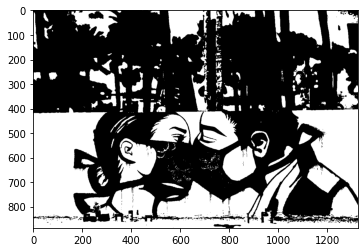

[[[  1  -1  -1  -1]
  [  2   0  -1  -1]
  [  3   1  -1  -1]
  ...
  [553 551  -1  -1]
  [554 552  -1  -1]
  [ -1 553  -1  -1]]]


error: ignored

In [67]:
img= cv2.imread('스크린샷(8).png')
img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh= cv2.threshold(img_gray,170,255,0)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours= cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[1]#윤곽선에대한 정보 [1]에 해당
print(contours)
img=cv2.drawContours(img, contours, -1, (255,0, 0), 1) 
# 모든 윤관석을 그리고자 하면 contour_index: -1
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

# **Contours 처리**
contours의 사각형 외각 처리

cv2.boundingRect(contour) : contour를 포함하는 사각형을 그림

>> 사각형의 x,y 좌표와 너비, 높이를 반환

In [68]:
uploaded = files.upload()

Saving d0.png to d0.png


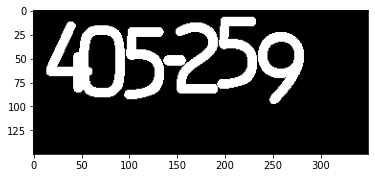

In [83]:
image = cv2.imread('d0.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

In [82]:
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]
image = cv2.drawContours(image, contours, 0, (0, 0, 255), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

error: ignored

In [85]:
contour = contours[0]
x, y, w, h = cv2.boundingRect(contour)
image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

error: ignored


# **cv2.convexHull(contour)** 

여러 포인트점이 존재할 때 다각형 형태의 사각형보다 타이트한 외곽을 찾는다.
Convex Hull 알고리즘으로 외곽을 구하는 함수

대략적인 형태의 Contour 외곽을 빠르게 구할 수 있습니다. (단일 Contour 반환)

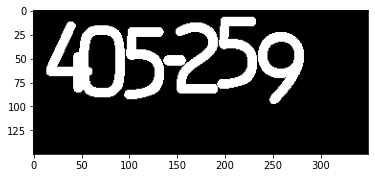

error: ignored

In [89]:
image = cv2.imread('d0.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
contour = contours[0]
hull = cv2.convexHull(contour)
image = cv2.drawContours(image, [hull], -1, (255, 0, 0), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# **contour의 유사 다각형 구하기**
cv2.approxPolyDP(curve, epsilon, closed): 근사치 Contour를 구합니다.

curve: Contour

epsilon: 최대 거리 (클수록 Point 개수 감소)

closed: 폐곡선 여부

In [91]:

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('d0.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]
epsilon = 0.01 * cv2.arcLength(contour, True)
approx = cv2.approxPolyDP(contour, epsilon, True)
image = cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

error: ignored

cv2.contourArea(contour): Contour의 면적을 구합니다.

cv2.arcLength(contour): Contour의 둘레를 구합니다.

cv2.moments(contour): Contour의 특징을 추출합니다.

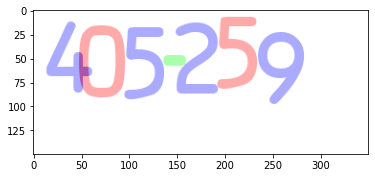

In [94]:
image = cv2.imread('d0.png')
plt.imshow(image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()